In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization,Add,Input,Concatenate,Dropout,Add

In [5]:
!pip install opencv-python

In [6]:
from tensorflow.keras.layers import Add, Conv2D, BatchNormalization, Activation, MaxPooling2D, AveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import Input



def resnet_block(x, filters, num_blocks):
    
    if filters!=64:
        shortcut = Conv2D(filters, (1, 1), strides=(1, 1), padding='same',activation='relu')(x)
        x = Conv2D(filters,(3,3), padding='same',activation='relu')(x)
        x = Conv2D(filters,(3,3), padding='same',activation='relu')(x)
        x = BatchNormalization()(x)
        x=Add()([x, shortcut])
        num_blocks=num_blocks-1
    
    for i in range(num_blocks):
        input=x
        x = Conv2D(filters,(3,3), padding='same',activation='relu')(x)
        x = Conv2D(filters,(3,3), padding='same',activation='relu')(x)
        x = BatchNormalization()(x)
        x=Add()([x, input])
    
    return x


def resnet_34(input_shape=(224, 224, 3)):
    
    inputs = Input(shape=input_shape)
    filters = [64, 128, 256, 512]
    block_sizes = [3, 4, 6, 3]

    
    # Initial convolutional layer
    
    x = Conv2D(64, (7, 7), strides=(2, 2),padding='same',activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    for i, num_blocks in enumerate(block_sizes):
        x = resnet_block(x, filters[i], num_blocks)
    

    x = AveragePooling2D()(x)
    x = Flatten()(x)
    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model


model = resnet_34()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_36 (Conv2D)             (None, 112, 112, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 56, 56, 64)  0           ['conv2d_36[0][0]']              
                                                                                              

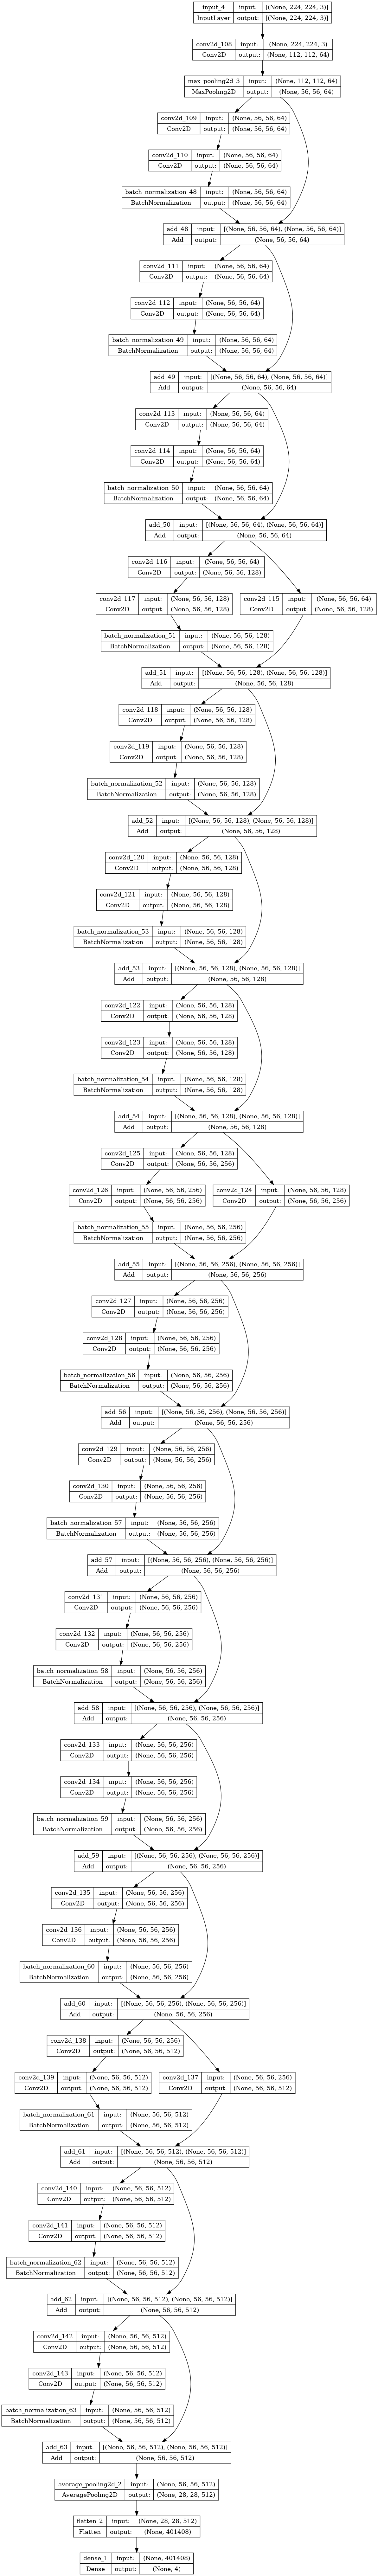

In [10]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False,
)
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [7]:
import glob
import librosa
import numpy as np
import cv2
Mild_Demented = glob.glob('/kaggle/input/alzheimer-mri-dataset/Dataset/Mild_Demented/*.jpg')
Moderate_Demented = glob.glob('/kaggle/input/alzheimer-mri-dataset/Dataset/Moderate_Demented/*.jpg')
Non_Demented = glob.glob('/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/*.jpg')
Very_Mild_Demented = glob.glob('/kaggle/input/alzheimer-mri-dataset/Dataset/Very_Mild_Demented/*.jpg')

data = []
labels = []

image_size=(224,224)

for i in Mild_Demented:   
    image = cv2.imread(i)
    # Resize the image
    image = cv2.resize(image, image_size)

    data.append(image)
    labels.append(0)

for i in Moderate_Demented:   
    image = cv2.imread(i)
    # Resize the image
    image = cv2.resize(image, image_size)

    data.append(image)
    labels.append(1)
    

for i in Non_Demented:   
    image = cv2.imread(i)
    # Resize the image
    image = cv2.resize(image, image_size)

    data.append(image)
    labels.append(2)
    
for i in Very_Mild_Demented:   
    image = cv2.imread(i)
    # Resize the image
    image = cv2.resize(image, image_size)

    data.append(image)
    labels.append(3)
    
X=np.array(data)
y=np.array(labels)
y.shape

(6400,)

In [12]:
X.shape

(6400, 224, 224, 3)

In [14]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Perform train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=32)

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train,validation_data=(X_val,y_val),epochs=10, batch_size=50)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

Epoch 1/10
82/82 [==============================] - 130s 1s/step - loss: 14.5894 - accuracy: 0.6877 - val_loss: 186.5553 - val_accuracy: 0.4941
Epoch 2/10
82/82 [==============================] - 100s 1s/step - loss: 4.9848 - accuracy: 0.7708 - val_loss: 56.4271 - val_accuracy: 0.5039
Epoch 3/10
82/82 [==============================] - 100s 1s/step - loss: 3.7127 - accuracy: 0.8027 - val_loss: 28.4649 - val_accuracy: 0.5557
Epoch 4/10
82/82 [==============================] - 100s 1s/step - loss: 1.1823 - accuracy: 0.8958 - val_loss: 3.7081 - val_accuracy: 0.8008
Epoch 5/10
82/82 [==============================] - 98s 1s/step - loss: 1.0635 - accuracy: 0.9094 - val_loss: 18.3442 - val_accuracy: 0.5332
Epoch 6/10
82/82 [==============================] - 98s 1s/step - loss: 0.8170 - accuracy: 0.9236 - val_loss: 4.9614 - val_accuracy: 0.8047
Epoch 7/10
82/82 [==============================] - 100s 1s/step - loss: 0.7317 - accuracy: 0.9304 - val_loss: 4.4221 - val_accuracy: 0.7979
Epoch 8/1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


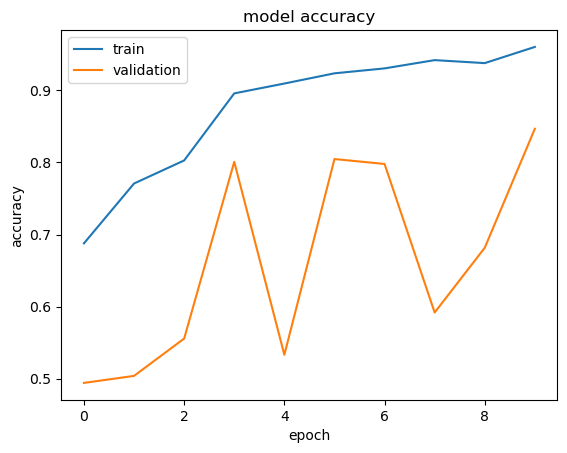

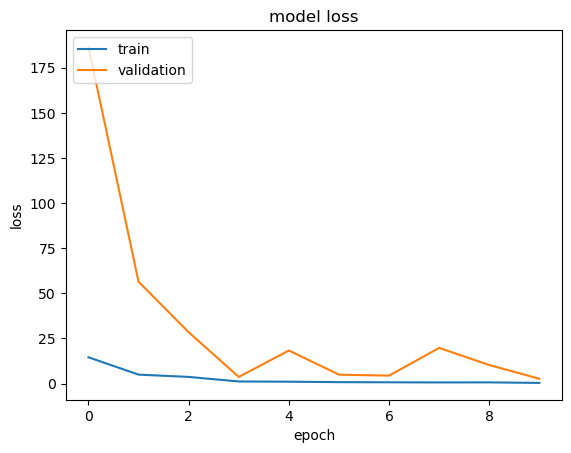

In [16]:

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [17]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Generate the classification report
class_names = list(['Mild_Demented','Moderate_Demented','Non_Demented','Very_Mild_Demented'])

# Generate the classification report
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
report = classification_report(y_test, predicted_classes, target_names=class_names)
print("Classification Report:\n", report)

40/40 [==============================] - 9s 224ms/step
Classification Report:
                     precision    recall  f1-score   support

     Mild_Demented       0.97      0.63      0.76       177
 Moderate_Demented       0.92      1.00      0.96        12
      Non_Demented       0.78      0.99      0.87       648
Very_Mild_Demented       0.91      0.67      0.77       443

          accuracy                           0.83      1280
         macro avg       0.89      0.82      0.84      1280
      weighted avg       0.85      0.83      0.82      1280



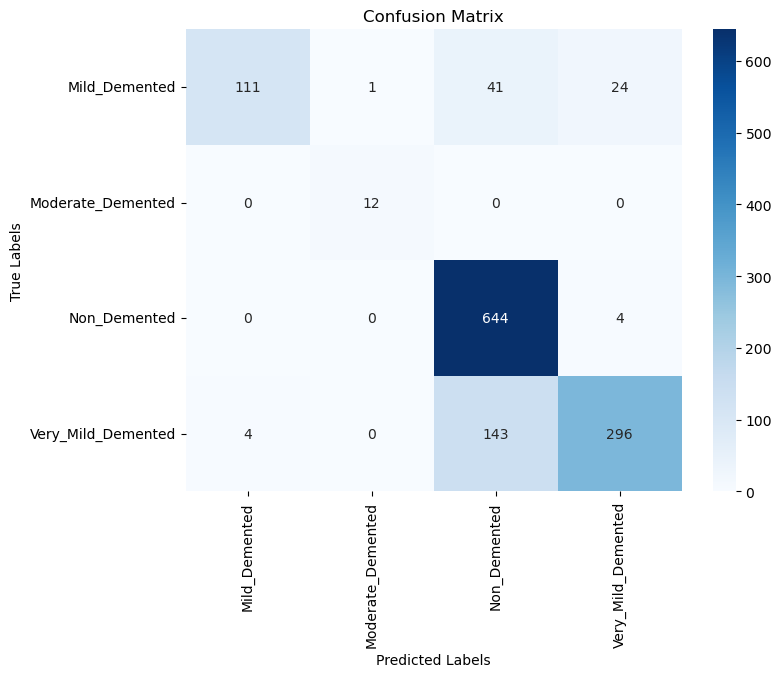

In [18]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes )
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()